In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

### Cosine Similarity

I will be using the Cosine Similarity to calculate a numeric quantity that denotes the similarity between two movies. Mathematically, it is defined as follows:

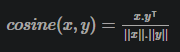

In [6]:
df = pd.read_csv('movies_final.csv')
df['description'] = df['description'].fillna('')
df = df.drop_duplicates(subset='title')
print(df.shape)

# Make DataFrame smaller selecting random movies
df = df.sample(n=27000)
print(df.shape)

# The "TfidfVectorizer" from the scikit-learn library converts the movie descriptions into a matrix of 
# TF-IDF (term frequency-inverse document frequency) features. 
# This vectorization is used to convert the textual data into a numerical format that can be used for similarity analysis.
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(df['description'])
print(f"tfidf_matrix.shape: , {tfidf_matrix.shape}")

# The "linear_kernel" function from scikit-learn's "metrics.pairwise" module is used to compute the pairwise cosine similarity 
# between all movies based on the TF-IDF features.
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# We now have a pairwise cosine similarity matrix for all the movie. 
# The next step is to write a function that returns the 5 most similar movies based on the cosine similarity score.

df = df.reset_index()
titles = df['title']
indices = pd.Series(df.index, index=df['title'])

# To use the "get_recommendations" function, the code creates a Pandas Series object named "indices" where the index 
# is the title of each movie, and the value is the corresponding index in the "df" DataFrame. This is done to 
# quickly retrieve the index of a movie given its title.

def get_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:6]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

# Let's try and get the top recommendations for a few movies and see how good the recommendations are.

(42196, 13)
(27000, 13)
tfidf_matrix.shape: , (27000, 704950)


In [3]:
df.head()

,index,id,belongs_to_collection,budget,popularity,poster_path,release_date,revenue,title,vote_average,returns,production_companies,production_countries,description
0,66458,66458,NaN,0,0.352379,/jsWR6NfYRD0VumISH7GkGy9ZMW9.jpg,1957-08-29,0,The Third Sex,5.5,0.0,Arca-Filmproduktion GmbH,Germany,Klaus is a young man in post-war Berlin. He is...
1,75544,75544,NaN,0,2.711057,/eG5Hq3GkDzZMmETB9soAz5UCI8Y.jpg,2014-12-31,0,Manny,6.4,0.0,Revelin Studios,United States of America,From abject poverty to becoming a ten-time box...
2,107789,107789,NaN,9500000,2.002313,/dEvfpB05SBMmQtxuW9KE43eDz48.jpg,2016-04-01,0,Finding Altamira,5.7,0.0,Morena Films,Spain,The story of nine-year old Maria and her fathe...
3,83875,83875,NaN,0,0.622255,/kEsvn0DWCE0xK65VrDL1XITjKm8.jpg,1980-09-26,0,In God We Tru$t,5.8,0.0,Universal Pictures,United States of America,"A naive monk, named Brother Ambrose (Marty Fel..."
4,79041,79041,NaN,0,0.037969,/j5aNjW2L2sHJkjo1BjlbEkX9iDT.jpg,1988-11-11,0,Spike of Bensonhurst,9.0,0.0,FilmDallas Pictures,United States of America,Spike Fumo is an Italian kid apsiring to be a ...


In [5]:
get_recommendations("Toy Story")

22942                         Toy Story 2
5237                          Toy Story 3
3940               The 40 Year Old Virgin
15848         Andy Hardy's Blonde Trouble
8002     Andy Kaufman Plays Carnegie Hall
Name: title, dtype: object